In [ ]:
# Titanic Dataset - EDA Project

In [7]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Read or Load Dataset
df = pd.read_csv("train.csv")

In [10]:
# Overview of Data
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [11]:
# Handling missing values
median = df["Age"].median()
df["Age"]= df["Age"].fillna(median)
mode = df["Embarked"].mode()[0]
df["Embarked"]= df["Embarked"].fillna(mode)
df.drop(columns="Cabin",inplace = True)

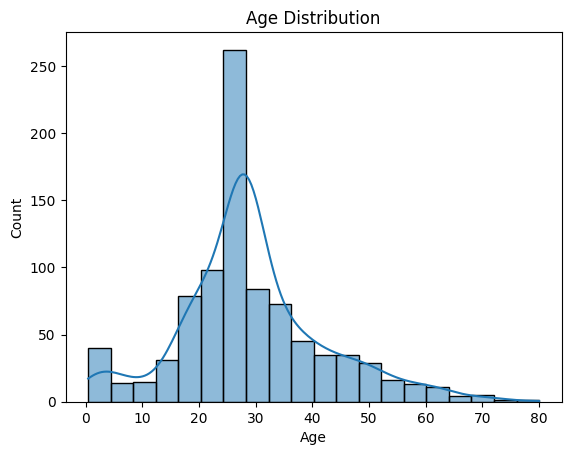

In [12]:
# Univariate Analysis - Age
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

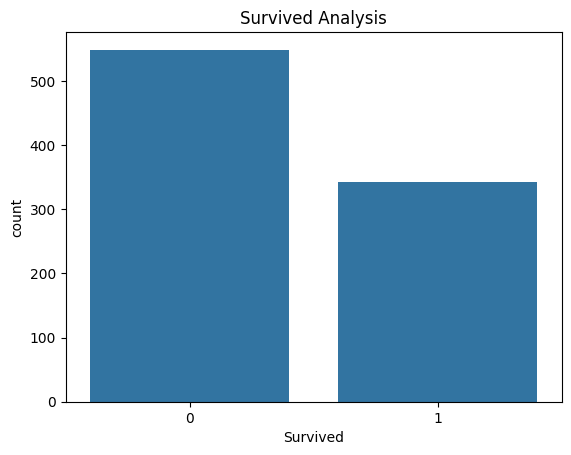

In [25]:
# Univariate Analysis - Survived
sns.countplot(x="Survived", data=df)
plt.title("Survived Analysis")
plt.show()
plt.show()

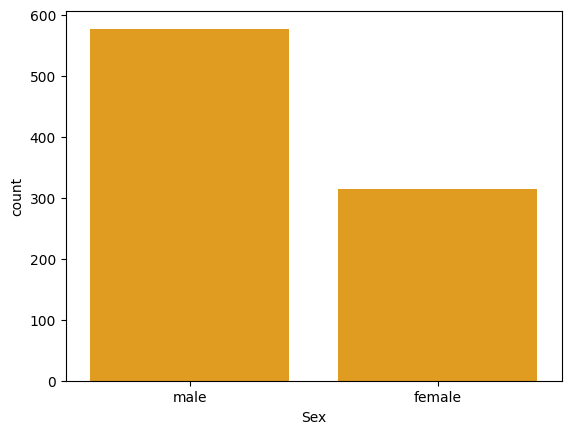

In [34]:
# Univariate Analysis - Gender
sns.countplot(x="Sex", data=df, color="orange")
plt.show()

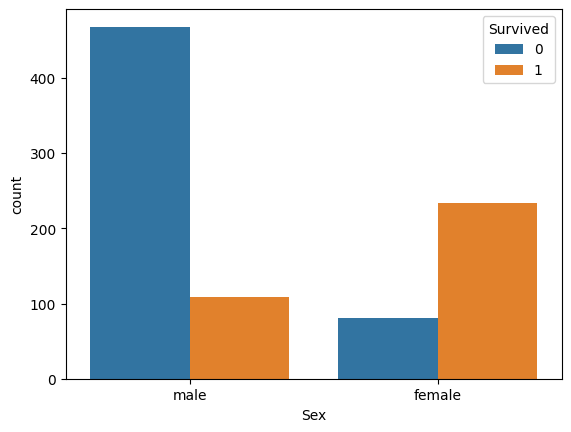

In [33]:
# Bivariate Analysis - Sex vs Survived
sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

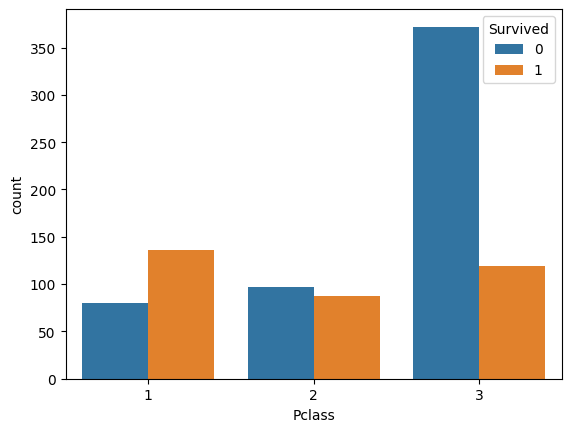

In [35]:
# Bivariate Analyis - Pclass vs Survived
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

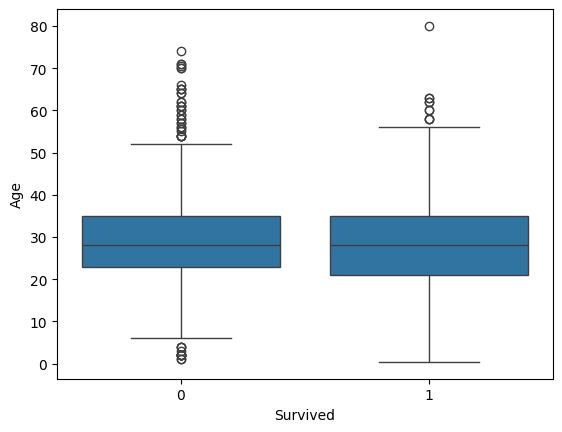

In [36]:
# Bivariate Analysis - Survived and Age
sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

In [37]:
# Handling Outliers
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df["Fare"] < lower) | (df["Fare"] > upper)]


In [40]:
# Outliers
print("Number of Fare outliers:", outliers.shape[0])

Number of Fare outliers: 116


In [39]:
# Observation:
# Fare contains many outliers due to right-skewed distribution.
# These represent high-paying passengers and are valid values.
# Hence, outliers are not removed for this analysis.